In [2]:
import os
import sys
import numpy as np
import polars as pl

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(notebook_dir)



model = "AR"
sample = "22Rv1"
project_path = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding"
jaspar_file = f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motifs/{model}.jaspar" 
# jaspar_file = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motif.jaspar"  # Update this path


df = pl.read_parquet(project_path + "/data/processed_results/" + model + "_" + sample + "_processed.parquet", columns=["chr_name", "start", "end", "cell_line", "targets", "predicted", "weights", "probabilities", "attributions"])
df = df.rename({"chr_name": "chr"})
df


chr,start,end,cell_line,targets,predicted,weights,probabilities,attributions
str,i64,i64,str,f64,f64,f64,f64,list[list[f64]]
"""chr8""",37573151,37573540,"""22Rv1""",-1.0,0.0,-1.0,0.000019,"[[0.0, 0.0, … 0.002385], [0.0, -0.041466, … 0.002814], … [0.0, 0.0, … 0.000003]]"
"""chr8""",133171276,133171803,"""22Rv1""",-1.0,0.0,-1.0,0.000143,"[[0.0, 0.0, … 0.002163], [0.0, 0.0, … 0.00187], … [0.0, 0.0, … 0.000121]]"
"""chr7""",47548049,47548463,"""22Rv1""",-1.0,0.0,-1.0,0.00023,"[[0.0, 0.0, … -0.005168], [0.114217, 0.0, … -0.004238], … [0.0, 0.0, … -0.000085]]"
"""chr22""",48497772,48498172,"""22Rv1""",-1.0,0.0,-1.0,0.000474,"[[0.0, 0.0, … -1.2270e-7], [0.0, 0.0, … 0.000031], … [0.0, 0.0, … -0.000331]]"
"""chr16""",11676447,11677626,"""22Rv1""",-1.0,0.0,-1.0,0.000249,"[[0.0, 0.0, … -0.001183], [0.0, 0.0, … -0.001769], … [0.0, 0.0, … -0.00577]]"
…,…,…,…,…,…,…,…,…
"""chr3""",115072575,115072962,"""22Rv1""",-1.0,0.0,-1.0,0.203823,"[[0.0, 0.0, … 0.003236], [0.0, 0.10556, … 0.005596], … [0.0, 0.0, … 0.001156]]"
"""chr5""",5497296,5497687,"""22Rv1""",-1.0,0.0,-1.0,0.003058,"[[0.0, 0.0, … 0.002406], [0.019762, 0.0, … 0.004138], … [0.0, 0.0, … 0.004363]]"
"""chr13""",110593391,110594049,"""22Rv1""",-1.0,0.0,-1.0,0.032402,"[[0.0, 0.0, … 0.002447], [0.001703, 0.0, … 0.004039], … [0.0, 0.0, … 0.000646]]"


In [3]:
import tempfile
from src.utils.generate_training_peaks import run_bedtools_command
def intersect_bed_files(main_df: pl.DataFrame, intersect_df: pl.DataFrame, region_type: str = None) -> pl.DataFrame:
    """
    Intersect two BED files using bedtools and return the original DataFrame with overlap flags.
    
    Args:
        main_df: Primary Polars DataFrame with BED data
        intersect_df: Secondary Polars DataFrame to intersect with
        region_type: Optional region type label to add to results
        
    Returns:
        Original DataFrame with additional column indicating overlaps
    """
    with tempfile.NamedTemporaryFile(delete=False, mode='w') as main_file, \
         tempfile.NamedTemporaryFile(delete=False, mode='w') as intersect_file, \
         tempfile.NamedTemporaryFile(delete=False, mode='w') as result_file:
        
        main_path = main_file.name
        intersect_path = intersect_file.name
        result_path = result_file.name

        # Write DataFrames to temporary files
        main_df.write_csv(main_path, separator="\t", include_header=False)
        intersect_df.write_csv(intersect_path, separator="\t", include_header=False)

        # Run bedtools intersect with -c flag to count overlaps
        command = f"bedtools intersect -a {main_path} -b {intersect_path} -c > {result_path}"
        run_bedtools_command(command)

        # Read results back into Polars DataFrame
        result_df = pl.read_csv(
            result_path,
            separator="\t",
            has_header=False,
            new_columns=[*main_df.columns, "overlap_count"]
        )

    # Clean up temporary files
    os.remove(main_path)
    os.remove(intersect_path) 
    os.remove(result_path)

    # Add boolean overlap column
    result_df = result_df.with_columns(
        pl.col("overlap_count").gt(0).alias("overlaps_ground_truth")
    ).drop("overlap_count")

    return result_df

ground_truth_file = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/data/transcription_factors/AR/merged/22RV1_AR_merged.bed"


df_ground_truth = pl.read_csv(ground_truth_file, 
                             separator="\t", 
                             has_header=False,
                             new_columns=["chr", "start", "end", "weights"],
                             columns=[0,1,2,3])

df_ground_truth_filtered = df_ground_truth.filter(pl.col("weights") > pl.col("weights").median()).drop("weights")

intersected_df = intersect_bed_files(df[["chr", "start", "end"]], df_ground_truth_filtered)


# add overlaps ground truth to df from intersected_df
ground_truth_df = df.join(intersected_df, on=["chr", "start", "end"], how="left")
# add overlaps_ground_truth to df under targets, 1 if overlaps_ground_truth is true, 0 otherwise
ground_truth_df = ground_truth_df.with_columns(pl.when(pl.col("overlaps_ground_truth")).then(1).otherwise(0).alias("targets"))
ground_truth_df

chr,start,end,cell_line,targets,predicted,weights,probabilities,attributions,overlaps_ground_truth
str,i64,i64,str,i32,f64,f64,f64,list[list[f64]],bool
"""chr8""",37573151,37573540,"""22Rv1""",0,0.0,-1.0,0.000019,"[[0.0, 0.0, … 0.002385], [0.0, -0.041466, … 0.002814], … [0.0, 0.0, … 0.000003]]",false
"""chr8""",133171276,133171803,"""22Rv1""",0,0.0,-1.0,0.000143,"[[0.0, 0.0, … 0.002163], [0.0, 0.0, … 0.00187], … [0.0, 0.0, … 0.000121]]",false
"""chr7""",47548049,47548463,"""22Rv1""",0,0.0,-1.0,0.00023,"[[0.0, 0.0, … -0.005168], [0.114217, 0.0, … -0.004238], … [0.0, 0.0, … -0.000085]]",false
"""chr22""",48497772,48498172,"""22Rv1""",0,0.0,-1.0,0.000474,"[[0.0, 0.0, … -1.2270e-7], [0.0, 0.0, … 0.000031], … [0.0, 0.0, … -0.000331]]",false
"""chr16""",11676447,11677626,"""22Rv1""",0,0.0,-1.0,0.000249,"[[0.0, 0.0, … -0.001183], [0.0, 0.0, … -0.001769], … [0.0, 0.0, … -0.00577]]",false
…,…,…,…,…,…,…,…,…,…
"""chr3""",115072575,115072962,"""22Rv1""",0,0.0,-1.0,0.203823,"[[0.0, 0.0, … 0.003236], [0.0, 0.10556, … 0.005596], … [0.0, 0.0, … 0.001156]]",false
"""chr5""",5497296,5497687,"""22Rv1""",0,0.0,-1.0,0.003058,"[[0.0, 0.0, … 0.002406], [0.019762, 0.0, … 0.004138], … [0.0, 0.0, … 0.004363]]",false
"""chr13""",110593391,110594049,"""22Rv1""",0,0.0,-1.0,0.032402,"[[0.0, 0.0, … 0.002447], [0.001703, 0.0, … 0.004039], … [0.0, 0.0, … 0.000646]]",false


In [4]:
# take all the targets that are 1, and an equal number of targets that are 0
df_positive = ground_truth_df.filter(pl.col("targets") == 1)
df_negative = ground_truth_df.filter(pl.col("targets") == 0).sample(n=len(df_positive), seed=42)
df_balanced = pl.concat([df_positive, df_negative])
df_balanced

chr,start,end,cell_line,targets,predicted,weights,probabilities,attributions,overlaps_ground_truth
str,i64,i64,str,i32,f64,f64,f64,list[list[f64]],bool
"""chr17""",59735825,59736286,"""22Rv1""",1,1.0,-1.0,0.971799,"[[0.0, 0.0, … 0.001612], [0.0, 0.0, … 0.003626], … [0.0, 0.0, … 0.002316]]",true
"""chr5""",168281985,168283409,"""22Rv1""",1,1.0,-1.0,0.861876,"[[0.0, 0.0, … 0.019451], [0.0, 0.0, … 0.027579], … [0.0, 0.0, … 0.011231]]",true
"""chr8""",87585146,87585523,"""22Rv1""",1,1.0,-1.0,0.854366,"[[0.0, 0.0, … 0.001133], [0.021632, 0.0, … 0.001479], … [0.0, 0.0, … 0.00323]]",true
"""chr6""",76416854,76419494,"""22Rv1""",1,1.0,-1.0,0.720444,"[[0.0, 0.0, … 0.003563], [0.0, 0.029105, … 0.006817], … [0.0, 0.0, … 0.010321]]",true
"""chr7""",81634940,81635471,"""22Rv1""",1,1.0,-1.0,0.997399,"[[0.0, 0.0, … 0.010751], [0.015771, 0.0, … 0.01443], … [0.0, 0.0, … 0.000228]]",true
…,…,…,…,…,…,…,…,…,…
"""chr7""",148855074,148857092,"""22Rv1""",0,0.0,-1.0,0.007888,"[[0.0, 0.0, … 0.001623], [0.0, 0.0, … 0.002012], … [0.0, 0.0, … 0.002626]]",false
"""chr7""",601581,602663,"""22Rv1""",0,0.0,-1.0,0.000244,"[[0.0, 0.0, … 0.000124], [0.0, 0.0, … 0.000532], … [0.0, 0.0, … -0.000005]]",false
"""chr17""",79220176,79221328,"""22Rv1""",0,0.0,-1.0,0.014767,"[[0.0, 0.0, … -0.004958], [0.0, 0.019386, … -0.0082], … [0.0, 0.0, … 0.000499]]",false


In [6]:
def reshape_attributions(df):
    # Convert to numpy array first
    attributions = df['attributions'].values
    
    # Create empty array with correct shape
    n_samples = len(df)  # 46218
    reshaped = np.empty((n_samples, 4096, 5))
    
    # Fill the array by properly accessing each (5,) array
    for i, row in enumerate(attributions):
        for j, element in enumerate(row):
            reshaped[i, j] = element

    # Split into ACGT and ATAC components
    attrs_list = reshaped[..., :4].transpose(0, 2, 1)  # Shape: (n_samples, 4, 4096)
    atac_list = reshaped[..., 4]  # Shape: (n_samples, 4096)

    # Add chr, start, and end information to the ATAC component
    chr_data = df['chr'].values
    start_data = df['start'].values
    end_data = df['end'].values
    
    # Expand the ATAC list to include the chr, start, and end information for each row
    atac_list_with_meta = np.column_stack((chr_data, start_data, end_data, atac_list))
        
    return attrs_list, atac_list_with_meta

# Usage:
attrs_list, atac_list_with_meta = reshape_attributions(df_positive.to_pandas())
print(f"Attrs shape: {attrs_list.shape}")
#print(f"ATAC shape: {atac_list.shape}")
print(f"ATAT with meta shape: {atac_list_with_meta.shape}")

Attrs shape: (9330, 4, 4096)
ATAT with meta shape: (9330, 4099)


In [7]:
# Import additional required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')
from tangermeme.plot import plot_logo
from tangermeme.seqlet import recursive_seqlets

# Get seqlets
def get_seqlets(attrs_list):
    attrs_array = np.stack(attrs_list, axis=0)
    seqlets = recursive_seqlets(attrs_array.sum(axis=1))
    
    nt_idx = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    
    # Add sequences to seqlets df
    sequences = []
    for i in range(len(seqlets)):
        sample = seqlets.iloc[i]
        start = int(sample['start'])
        end = int(sample['end'])
        sample_idx = int(sample['example_idx'])
        
        sample_attrs = attrs_array[sample_idx, :, start:end].T.squeeze()
        hits = np.argmax(sample_attrs, axis=1)
        seq = ''.join([nt_idx[i] for i in hits])
        sequences.append(seq)
    seqlets['sequence'] = sequences
    
    return seqlets

# Plot function (simplified version)
def plot_seqlet(seqlets, attrs_list, sample_rank=0, context_size=20):
    sample = seqlets.iloc[[sample_rank]]
    slice = int(sample['example_idx'].tolist()[0])
    sequence = sample['sequence'].tolist()[0]
    start = int(sample['start'].tolist()[0])
    end = int(sample['end'].tolist()[0])
    
    seqlen = end - start
    window_size = seqlen + (context_size * 2)
    
    X_attr = attrs_list[slice]
    X_attr = X_attr.astype(np.float64)
    
    TSS_pos = int(np.mean([start, end]))
    window = (TSS_pos - (window_size // 2), TSS_pos + (window_size // 2))
    
    plt.figure(figsize=(16, 9), dpi=300)
    ax = plt.subplot(111)
    plot_logo(
        X_attr,
        ax=ax,
        start=window[0],
        end=window[1]
    )
    
    plt.xlabel("Genomic Coordinate")
    plt.ylabel("Attributions")
    plt.title(f"DeepLIFT Attributions for sample: {slice} | {sequence}")
    plt.show()

2025-02-28 10:09:22,223 - WARNING - Matplotlib is building the font cache; this may take a moment.


In [8]:
seqlets = get_seqlets(attrs_list)
seqlets

,example_idx,start,end,attribution,p-value,sequence
0,623,1875,1882,-17.958443,0.000001,AAGCGAA
1,6896,2108,2117,26.415586,0.000002,TGTTCCATT
2,976,1987,2001,-23.978551,0.000002,AACAATTAACTAGC
3,972,1865,1872,-17.081377,0.000002,AACATAC
4,7830,1959,1974,-24.302505,0.000002,AAGAAAAGCACATAA
...,...,...,...,...,...,...
56684,3079,2470,2476,-1.593142,0.009984,TATAGA
56685,6761,2146,2151,-1.335796,0.009984,AAATC
56686,4730,1626,1634,-2.573387,0.009984,CAGCCGAC
56687,9313,1726,1730,-1.061652,0.009984,CATC


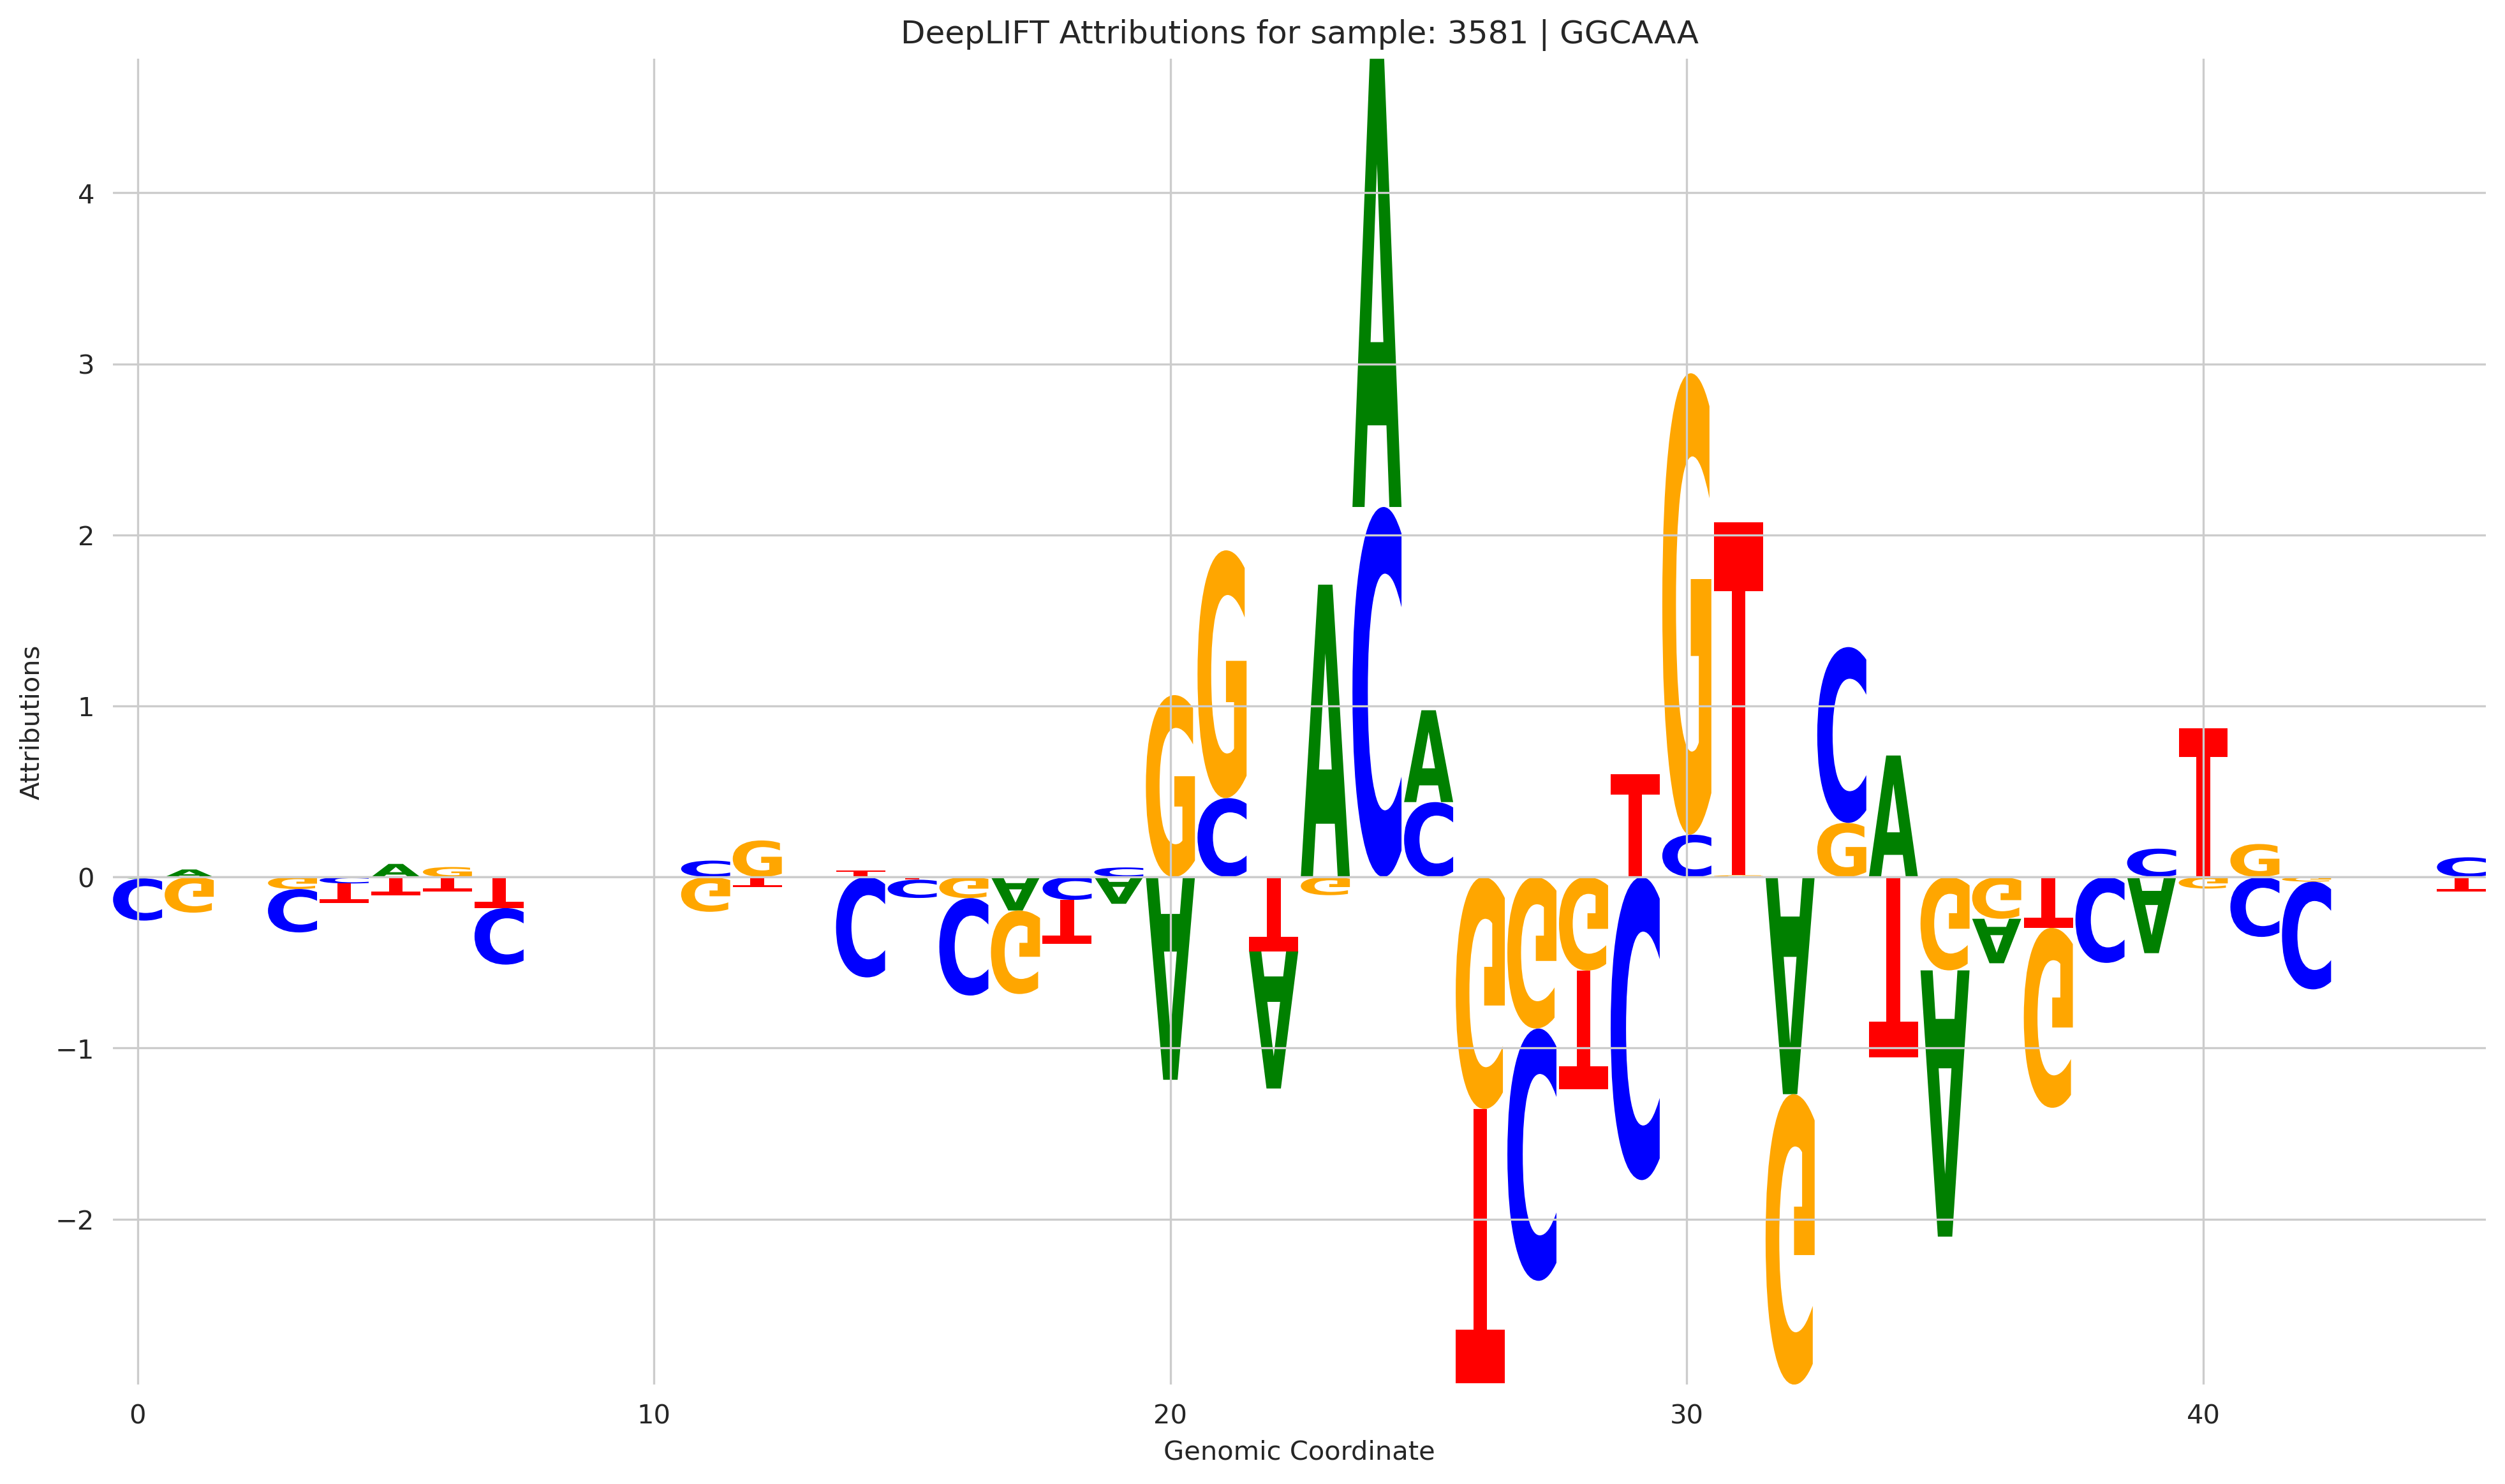

In [9]:
plot_seqlet(seqlets, attrs_list, sample_rank=6127, context_size=20)

In [8]:
from dataclasses import dataclass, field
from typing import List, Tuple

@dataclass
class PWM:
    """Container for position weight matrix data."""
    name: str
    matrix: np.ndarray
    bases: List[str] = field(default_factory=lambda: ['A', 'C', 'G', 'T'])
    
    def get_consensus(self, prob_threshold: float = 0.25) -> str:
        """Get consensus sequence from PWM using IUPAC ambiguity codes."""
        iupac_map = {
            'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T',
            'AC': 'M', 'AG': 'R', 'AT': 'W',
            'CG': 'S', 'CT': 'Y', 'GT': 'K',
            'ACG': 'V', 'ACT': 'H', 'AGT': 'D', 'CGT': 'B',
            'ACGT': 'N'
        }
        
        consensus = []
        for pos_probs in self.matrix.T:
            significant_bases = ''.join(b for b, p in zip(self.bases, pos_probs) 
                                     if p >= prob_threshold)
            significant_bases = ''.join(sorted(significant_bases))
            consensus.append(iupac_map.get(significant_bases, 'N'))
        return ''.join(consensus)

def parse_jaspar(jaspar_file: str) -> PWM:
    """Parse a JASPAR format PWM file."""
    with open(jaspar_file) as f:
        lines = f.readlines()
    
    if not lines or len(lines) != 5:
        raise ValueError("Invalid JASPAR format")
        
    name = lines[0].split()[0]
    matrix = []
    
    for line in lines[1:]:
        nums = line.split('[')[1].split(']')[0].strip().split()
        matrix.append([float(x) for x in nums])
    
    matrix = np.array(matrix)
    matrix = matrix / matrix.sum(axis=0)
    
    return PWM(name=name, matrix=matrix)

pwm = parse_jaspar(jaspar_file)
print(f"Loaded PWM: {pwm.name}")
print(f"Consensus sequence: {pwm.get_consensus()}")


Loaded PWM: >MA0007.2
Consensus sequence: RRGAACASAVWGTTC


In [9]:

def iupac_match(a: str, b: str) -> bool:
    """Check if two IUPAC nucleotide codes match."""
    iupac = {
        'A': {'A'},
        'C': {'C'},
        'G': {'G'},
        'T': {'T'},
        'R': {'A', 'G'},
        'Y': {'C', 'T'},
        'S': {'G', 'C'},
        'W': {'A', 'T'},
        'K': {'G', 'T'},
        'M': {'A', 'C'},
        'B': {'C', 'G', 'T'},
        'D': {'A', 'G', 'T'},
        'H': {'A', 'C', 'T'},
        'V': {'A', 'C', 'G'},
        'N': {'A', 'C', 'G', 'T'}
    }
    
    a = a.upper()
    b = b.upper()
    
    if a not in iupac or b not in iupac:
        raise ValueError(f"Invalid IUPAC code: {a if a not in iupac else b}")
        
    return bool(iupac[a] & iupac[b])


def levenshtein_iupac(seq1: str, seq2: str) -> int:
    """Calculate Levenshtein distance between two DNA sequences with IUPAC codes."""
    if not seq1: return len(seq2)
    if not seq2: return len(seq1)
    
    # Initialize lists instead of range objects
    previous_row = list(range(len(seq2) + 1))
    current_row = [0] * (len(seq2) + 1)
    
    for i, c1 in enumerate(seq1):
        current_row[0] = i + 1
        
        for j, c2 in enumerate(seq2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (not iupac_match(c1, c2))
            
            current_row[j + 1] = min(insertions, deletions, substitutions)
            
        previous_row, current_row = current_row, [0] * (len(seq2) + 1)  # Reset current_row
        
    return previous_row[-1]


def score_seqlet(pwm: PWM, seq: str) -> Tuple[float, int]:
    """Score a sequence against a PWM using IUPAC-aware Levenshtein distance."""
    from Bio import motifs
    from Bio.Seq import Seq
    
    seq_len = len(seq)
    pwm_width = pwm.matrix.shape[1]
    consensus = pwm.get_consensus()
    
    if seq_len < pwm_width:
        max_score = float('-inf')
        best_pos = 0
        for i in range(pwm_width - seq_len + 1):
            cons_slice = consensus[i:i+seq_len]
            raw_dist = levenshtein_iupac(seq, cons_slice)
            norm_score = 1 - (raw_dist / max(len(seq), len(cons_slice)))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos
    
    elif seq_len == pwm_width:
        raw_dist = levenshtein_iupac(seq, consensus)
        norm_score = 1 - (raw_dist / len(consensus))
        return norm_score, 0
    
    else:
        max_score = float('-inf')
        best_pos = 0
        for i in range(seq_len - pwm_width + 1):
            subseq = seq[i:i+pwm_width]
            raw_dist = levenshtein_iupac(subseq, consensus)
            norm_score = 1 - (raw_dist / len(consensus))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos

In [10]:

from tqdm.notebook import tqdm

scores = []
positions = []
for _, row in tqdm(seqlets.iterrows(), total=len(seqlets)):
    score, pos = score_seqlet(pwm, row['sequence'])
    scores.append(score)
    positions.append(pos)

# Add scores to dataframe
seqlets['pwm_score'] = scores
seqlets['pwm_position'] = positions

# Sort by score and display top matches
top_matches = seqlets.sort_values('pwm_score', ascending=False).head(10)
print("\nTop 10 PWM matches:")
print(top_matches[['sequence', 'pwm_score', 'pwm_position']])

  0%|          | 0/56689 [00:00<?, ?it/s]


Top 10 PWM matches:
      sequence  pwm_score  pwm_position
35500     GAAA        1.0             7
56624     AGAC        1.0             6
35506     TGTT        1.0            10
56688   ACAGTG        1.0             6
8         AATG        1.0             8
56631     ACAA        1.0             6
56677     AAGA        1.0             0
56678     AGAG        1.0             6
62        AATG        1.0             8
56663    AAAGT        1.0             8


In [11]:

def write_fasta(sequences, outfile):
    """Write sequences to FASTA format with auto-generated headers."""
    with open(outfile, 'w') as f:
        for i, seq in enumerate(sequences):
            f.write(f'>seq_{i+1}\n{seq}\n')


def save_seqlets(seqlets, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    pos_seqlets = seqlets[seqlets['attribution'] > 0].reset_index(drop=True)
    neg_seqlets = seqlets[seqlets['attribution'] < 0].reset_index(drop=True)

    pos_seqlets.to_csv(os.path.join(output_dir, "positive_seqlets.csv"), 
                       index=False)
    neg_seqlets.to_csv(os.path.join(output_dir, "negative_seqlets.csv"), 
                       index=False)
    
    candidate_motifs = pos_seqlets['sequence'].tolist()
    write_fasta(
        candidate_motifs, 
        outfile=os.path.join(output_dir, "positive_seqlets.fa")
    )



save_seqlets(seqlets, f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/")



In [12]:
# run python levenstein.py --jaspar motif.jaspar --seqlets positive_seqlets.csv --output lev_pwm.csv
os.system(f"python /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/levenstein.py --jaspar /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motif.jaspar --seqlets /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/positive_seqlets.csv --output /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/lev_pwm.csv")

2025-02-28 09:46:47,745 - INFO - Loading PWM from /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motif.jaspar
Traceback (most recent call last):
  File "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/levenstein.py", line 231, in <module>
    main()
  File "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/levenstein.py", line 194, in main
    pwm = parse_jaspar(args.jaspar)
  File "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/levenstein.py", line 109, in parse_jaspar
    with open(jaspar_file) as f:
FileNotFoundError: [Errno 2] No such file or directory: '/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motif.jaspar'


256

In [13]:
min_seqlet = 5
receptor_name = model.split("_")[0]
dir = f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}"
os.system(f"Rscript /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/posthoc.R {min_seqlet} {receptor_name} {dir}")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 31722 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): sequence
dbl (10): example_idx, start, end, attribution, p-value, pwm_score, pwm_posi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31722 Columns: 8
── Column specification ───────────────────────────────────────────────────────

# A tibble: 6,927 × 2
   sequence     n
   <chr>    <int>
 1 GAACAA     315
 2 GAACA      311
 3 AAACA      177
 4 TGTAC      154
 5 TGTTC      110
 6 AGAACA      95
 7 GTACA       95
 8 GTACAA      95
 9 GAACAT      92
10 GAACAC      89
# ℹ 6,917 more rows


Warning message:
Removed 16019 rows containing missing values (`geom_point()`). 
Warning message:
Removed 16019 rows containing missing values (`geom_point()`). 
`geom_smooth()` using formula = 'y ~ x'


Rows: 948
Columns: 15
$ example_idx          <dbl> 7830, 2373, 5216, 1940, 623, 967, 6896, 4743, 135…
$ start                <dbl> 1873, 1967, 2276, 1722, 1860, 2107, 2108, 1788, 2…
$ end                  <dbl> 1891, 1988, 2289, 1737, 1873, 2131, 2117, 1801, 2…
$ attribution.x        <dbl> 39.48282, 36.23848, 35.03024, 32.16126, 29.43252,…
$ `p-value.x`          <dbl> 8.265808e-06, 1.042316e-03, 1.101397e-05, 2.97147…
$ sequence             <chr> "AGTACCAGGTGTACGAGA", "CAAGGCATTCTGTTCTTATTT", "A…
$ pwm_score.x          <dbl> 0.6666667, 0.6666667, 0.6153846, 0.4666667, 0.538…
$ pwm_position.x       <dbl> 0, 0, 2, 0, 0, 6, 2, 2, 1, 1, 2, 0, 0, 4, 1, 0, 1…
$ attribution.y        <dbl> 39.48282, 36.23848, 35.03024, 32.16126, 29.43252,…
$ `p-value.y`          <dbl> 8.265808e-06, 1.042316e-03, 1.101397e-05, 2.97147…
$ pwm_score.y          <dbl> 0.6666667, 0.6666667, 0.6153846, 0.4666667, 0.538…
$ pwm_position.y       <dbl> 0, 0, 2, 0, 0, 6, 2, 2, 1, 1, 2, 0, 0, 4, 1, 0, 1…
$ levenshtein_scor

0

Trying to plot atac

[[ 0.00161172  0.00362563  0.00379648 ...  0.00416637  0.00324547
   0.00231641]
 [ 0.01945086  0.02757851  0.02845432 ...  0.01838478  0.01379785
   0.01123141]
 [ 0.00113323  0.0014787   0.0037751  ...  0.00448581  0.00307021
   0.00323035]
 ...
 [ 0.01599716  0.02428927  0.02233899 ...  0.03602419  0.02016627
   0.01684658]
 [ 0.00799565  0.01656378  0.0259207  ...  0.00142008  0.0025353
  -0.0037887 ]
 [ 0.00843812  0.01220921  0.01421466 ...  0.01603169  0.011264
   0.00775616]]


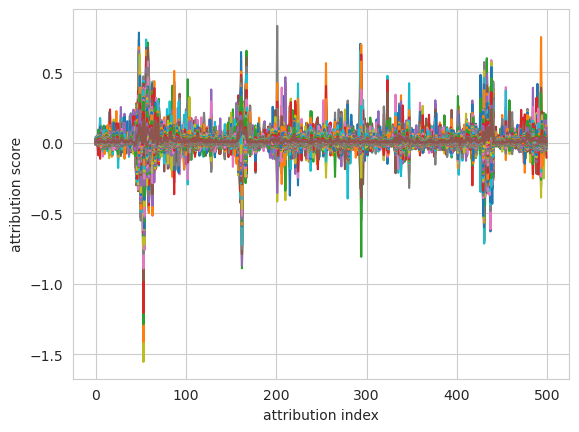

In [14]:
# Plotting contribution from ATAC
#atac_list
print(atac_list[:500])
plt.plot(atac_list[:500])
plt.xlabel("attribution index")
plt.ylabel("attribution score")
plt.show()

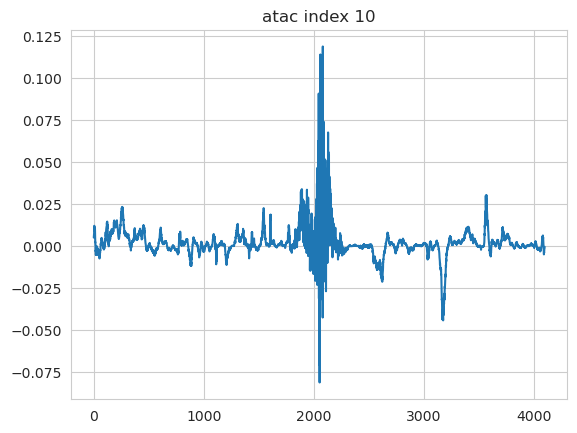

In [15]:
plt.plot(atac_list[10])
plt.title("atac index 10")
plt.show()

In [18]:
def plot_seqlet(seqlets, attrs_list, atac_list_with_meta, sample_rank=0, context_size=20):
    # Get the seqlet of interest
    sample = seqlets.iloc[[sample_rank]]
    slice = int(sample['example_idx'].tolist()[0])  # Get the example_idx
    sequence = sample['sequence'].tolist()[0]
    start = int(sample['start'].tolist()[0])
    end = int(sample['end'].tolist()[0])
    
    seqlen = end - start
    window_size = seqlen + (context_size * 2)
    
    X_attr = attrs_list[slice]
    X_attr = X_attr.astype(np.float64)
    
    TSS_pos = int(np.mean([start, end]))
    window = (TSS_pos - (window_size // 2), TSS_pos + (window_size // 2))
    
    # Extract ATAC data for the same region based on example_idx (slice)
    atac_data = atac_list_with_meta[slice]
    atac_chr = atac_data[0]  # Chromosome
    atac_start = atac_data[1]  # Start
    atac_end = atac_data[2]  # End
    atac_values = atac_data[3:]  # The actual ATAC contributions
    
    # Adjust ATAC values to match the region of interest (start to end)
    atac_region = atac_values[start:end]
    
    # Ensure that ATAC values are numeric and replace NaN or non-numeric values with 0
    atac_region = np.nan_to_num(atac_region, nan=0.0)  # Replace NaN with 0

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(16, 9), dpi=300, sharex=True)
    
    # Plot the motif logo
    ax1 = axs[0]
    plot_logo(
        X_attr,
        ax=ax1,
        start=window[0],
        end=window[1]
    )
    ax1.set_ylabel("Attributions")
    ax1.set_title(f"DeepLIFT Attributions for sample: {slice} | {sequence}")
    
    # Plot the ATAC contributions
    ax2 = axs[1]
    ax2.plot(range(start, end), atac_region, color='b', label="ATAC Contributions")
    ax2.fill_between(range(start, end), atac_region, color='b', alpha=0.2)
    ax2.set_xlabel("Genomic Coordinate")
    ax2.set_ylabel("ATAC Contributions")
    ax2.set_title(f"ATAC Contributions for {atac_chr} | {atac_start}-{atac_end}")
    
    plt.tight_layout()
    plt.show()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

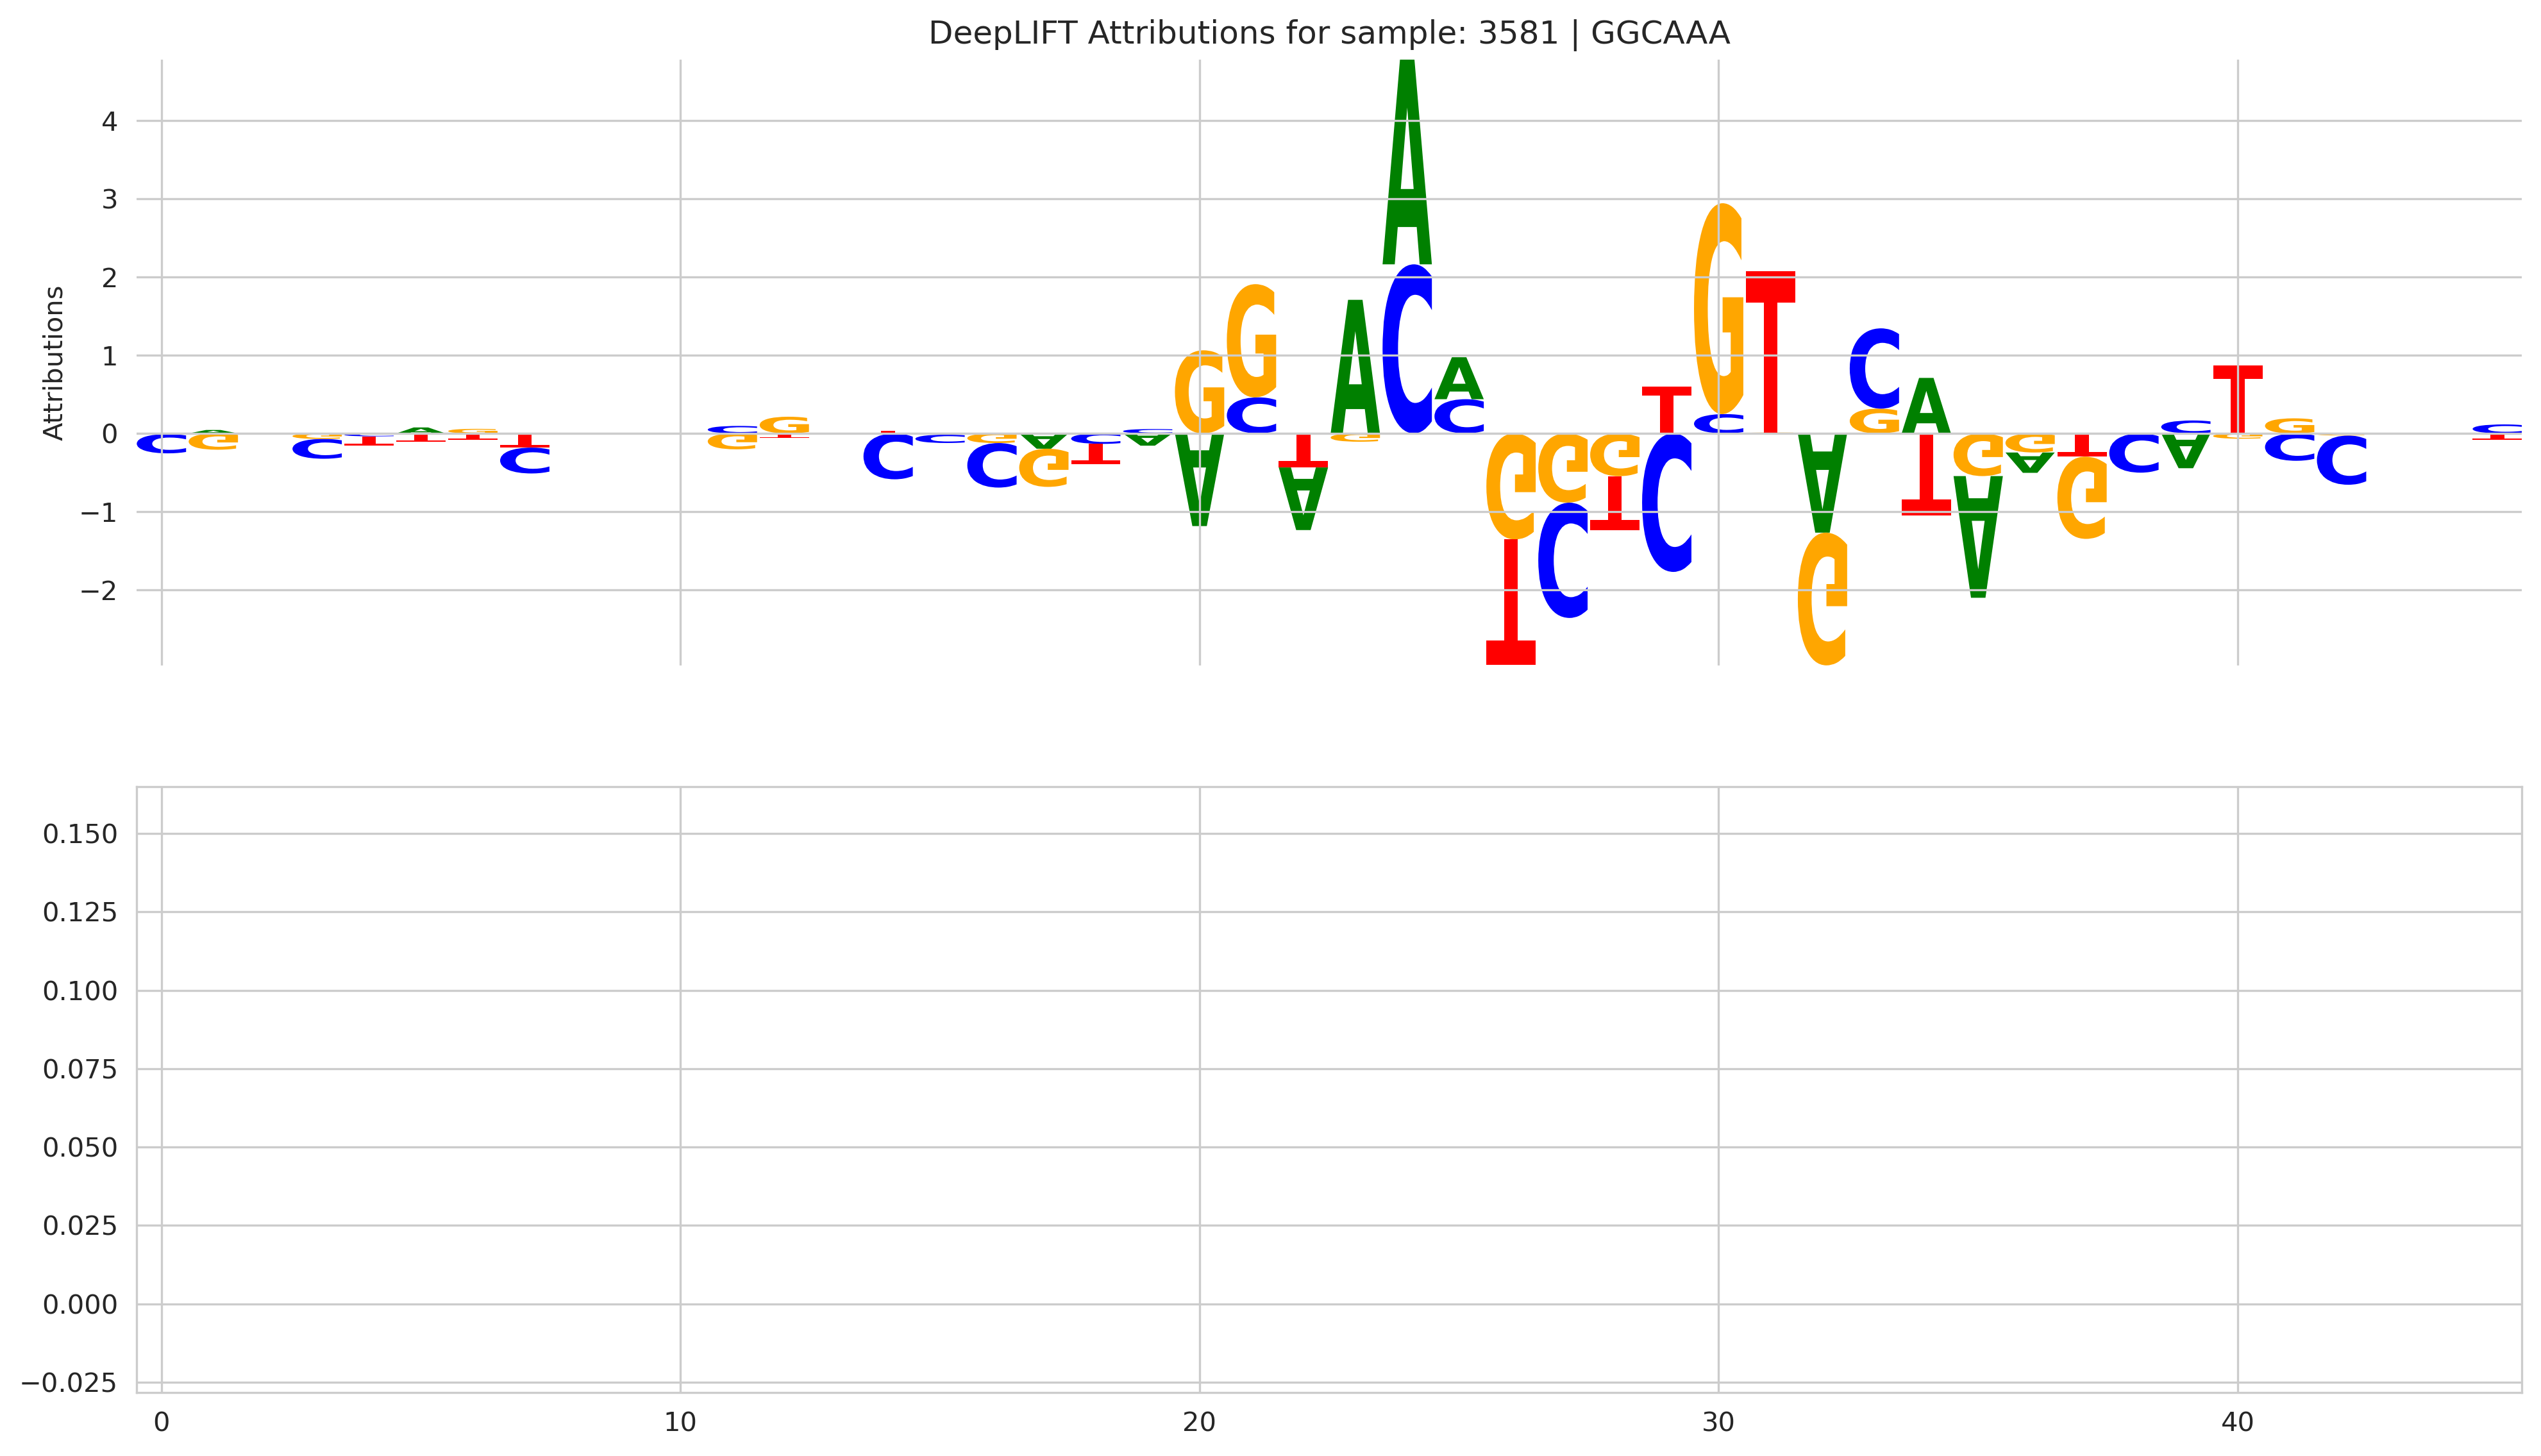

In [21]:
plot_seq(seqlets, attrs_list, atac_list_with_meta, sample_rank=6127, context_size=20)

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
# Adding in chr, start, end, 

import pandas as  pd
# Plotting atac attributions with the x representing the genomic position
genomic_position = []
attribution_score = []

plot_df = pd.DataFrame({})

for index in attrs_list:
    for pos, attribution in enumerate(index):
        genomic_position.append(pos)
        attribution_score.append(attribution)

plot_df = pd.DataFrame({
    'Genomic Position': genomic_position,
    'Attribution Score': attribution_score
})

print(plot_df)

#plt.plot(plot_df['Genomic Position'], plot_df['Attribution Score'], marker='o')
#plt.title('Genomic Position vs Attribution Score')
#plt.xlabel('Genomic Position')
#plt.ylabel('Attribution Score')
#plt.show()


# .dt.list.sum()


       Genomic Position                                  Attribution Score
0                     0  [0.0, 0.0, 0.0, 0.0, 0.0820547491, -0.04067447...
1                     1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0536484793, ...
2                     2  [0.0, 0.0, 0.0, 0.0, -0.0632244572, 0.0, 0.059...
3                     3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.074786894, 0.0, 0....
4                     0  [0.0, 0.0, 0.0, -0.0412801579, 0.0, -0.0168495...
...                 ...                                                ...
37315                 3  [0.0, 0.0, -0.0047504837, 0.0, 0.0, 0.0, 0.0, ...
37316                 0  [0.0, 0.0, 0.0, -0.0089282701, -0.0164967906, ...
37317                 1  [0.0, 0.0, -0.0287384298, -0.0158790406, 0.0, ...
37318                 2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.024...
37319                 3  [0.0, 0.0, 0.0175401047, 0.0, 0.0197393503, -0...

[37320 rows x 2 columns]


In [ ]:
# Trying to just adapt plotting function

# Genomic position of atac data
# PILEUP PROCESSING
import pysam
from pathlib import Path

pileup_dir = Path("/data1/projects/human_cistrome/aligned_chip_data/merged_cell_lines/22Rv1/pileup_mod/")
def process_pileups(pileup_dir: Path, chr_name: str, start: int, end: int):
    context_length = 4_096
    interval_length = end - start
    extra_seq = context_length - interval_length
    extra_left_seq = extra_seq // 2
    extra_right_seq = extra_seq - extra_left_seq

    start -= extra_left_seq
    end += extra_right_seq

    # get the pileup file for the given chromosome
    pileup_file = pileup_dir / f"{chr_name}.pileup.gz"

    assert pileup_file.exists(), f"pileup file for {pileup_file} does not exist"

    tabixfile = pysam.TabixFile(str(pileup_file))

    records = []
    for rec in tabixfile.fetch(chr_name, start, end):
        records.append(rec.split("\t"))

    # Convert records to a DataFrame using Polars:
    df = pl.DataFrame(
        {
            "chr_name": [rec[0] for rec in records],
            "position": [int(rec[1]) for rec in records],
            "nucleotide": [rec[2] for rec in records],
            "count": [float(rec[3]) for rec in records],
        }
    )

    return df
    




# Plot function (simplified version)
def plot_seqlet(seqlets, attrs_list, sample_rank=0, context_size=20):
    sample = seqlets.iloc[[sample_rank]]
    slice = int(sample['example_idx'].tolist()[0])
    sequence = sample['sequence'].tolist()[0]
    start = int(sample['start'].tolist()[0])
    end = int(sample['end'].tolist()[0])
    
    seqlen = end - start
    window_size = seqlen + (context_size * 2)
    
    X_attr = attrs_list[slice]
    X_attr = X_attr.astype(np.float64)
    
    TSS_pos = int(np.mean([start, end]))
    window = (TSS_pos - (window_size // 2), TSS_pos + (window_size // 2))
    
    plt.figure(figsize=(16, 9), dpi=300)
    ax = plt.subplot(111)
    plot_logo(
        X_attr,
        ax=ax,
        start=window[0],
        end=window[1]
    )
    
    plt.xlabel("Genomic Coordinate")
    plt.ylabel("Attributions")
    plt.title(f"DeepLIFT Attributions for sample: {slice} | {sequence}")
    plt.show()